In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
business = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [4]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
len(business)

150346

In [6]:
#  Filter out businesses that are not restaurants

# business['categories'].str.contains('Restaurants').value_counts()

In [7]:
#  Filter out businesses that are not restaurants

is_resaurant = business['categories'].str.contains('Restaurants')

# make the is_restaurant column from NA to False

is_resaurant = is_resaurant.fillna(False)

business = business[is_resaurant]


In [8]:
len(business)

52268

In [9]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


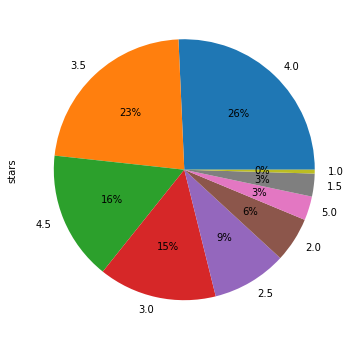

In [10]:
# draw a matplotlib piegram based on the stars
business['stars'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))

In [11]:
# business['state'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))

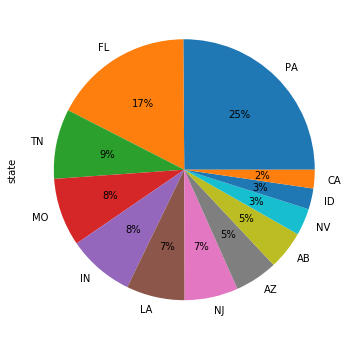

In [12]:
# draw a matplotlib piegram based on the states
# exclude the states with less than 1000 restaurants

state_counts = business['state'].value_counts()
state_counts[state_counts > 1000].plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))


In [13]:
# business['categories'].str.split(',').explode().value_counts().head(10).plot(kind='bar', figsize=(6, 6))

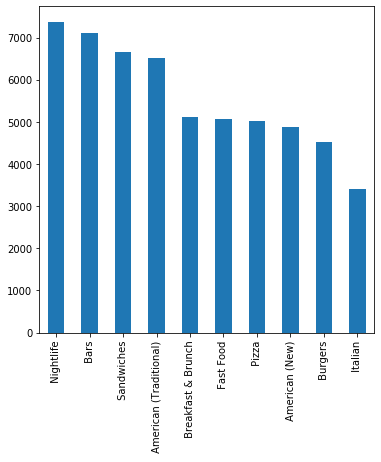

In [14]:
# draw a matplotlib on categories with the top 10 categories
# exclude the categories "Restaurants" and "Food"

categories = business['categories'].str.split(',').explode()
categories = categories[categories != 'Restaurants']
categories = categories[categories != ' Restaurants']
categories = categories[categories != 'Food']
categories = categories[categories != ' Food']
categories.value_counts().head(10).plot(kind='bar', figsize=(6, 6))

In [19]:
# save the business data to a csv file called yelp_academic_dataset_restaurants.csv

business.to_csv('yelp_academic_dataset_restaurants.csv', index=False)

In [20]:
# save the business data to a csv file called yelp_academic_dataset_restaurants.csv but only with 1/5 the data

business.sample(frac=0.1).to_csv('yelp_academic_dataset_restaurants_sample_01.csv', index=False)